##  Predicting Wine Quality: Insights from Physicochemical Properties  🍷
Group 6: Felix Li, Gurman Gill, Dia Zavery, Steve He

## 1. Summary
[Summary]

## 2. Introduction

Wine has been a symbol of culture and refinement throughout human history, with its production dating back thousands of years. The complexity of wine, influenced by its physicochemical properties, has fascinated scientists and winemakers alike. In recent years, the wine industry has increasingly turned to data analysis and machine learning to understand and predict wine quality. This scientific approach aims to decode the relationship between the chemical composition of wine and its quality as perceived by consumers.

In this project, our primary goal was to determine the best regression model for predicting wine quality and to identify which factors most effectively predict it. The quality of wine is a subject of interest for both enthusiasts and professionals in the field, as it can vary significantly based on a variety of measurable physicochemical properties. By applying regression analysis, we aimed to uncover the relationships between these properties and wine quality, thereby providing a predictive model that could be useful for winemakers and consumers alike. Our research question was formulated as follows: **"What is the best regression model to predict wine quality?"**

To address this question, we utilized a dataset that comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality), featuring two datasets related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets include 4,898 instances, with 11 features covering various physicochemical properties (such as acidity, sugar level, alcohol content) and 1 output variable representing sensory quality ratings on a scale. The datasets present an opportunity for both classification and regression analyses to model wine quality based on these properties.

Our approach involved conducting a comprehensive analysis to explore the relationships between the physicochemical attributes and the quality scores. Through the use of regression analysis and the implementation of a forward selection algorithm, we aimed to identify the most significant predictors of wine quality. This process allowed us to not only pinpoint the factors that have the most substantial impact on quality but also to determine the most accurate regression model for predicting the quality scores of wine based on its properties.

## 3. Data cleaning and wrangling 

In [2]:
library(tidyverse)
library(dplyr)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
data <- read.csv("data/winequality-red.csv",sep = ";")
head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [4]:
levels(as.factor(data$quality))

[1] "3" "4" "5" "6" "7" "8"

**manually define: If quality > 5, then red wine has good quality. If quality <= 5, then red wine has bad quality**

In [5]:
data2 <- data %>%
  mutate(quality = ifelse(quality <= 5, "bad", "good"))
head(data2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,bad
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,bad
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,bad
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,bad
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,bad


## 4. EDA

In [ ]:
long_wine_data <- wine_data %>%
  pivot_longer(cols = -quality, names_to = "Variable", values_to = "Value")

ggplot(long_wine_data, aes(x = Value, y = quality)) +
  geom_point(aes(color = Variable), alpha = 0.5) +
  geom_smooth(se = FALSE, method = "lm") +
  facet_wrap(~ Variable, scales = "free_x") +
  labs(title = "Wine Quality vs. Physicochemical Properties",
       x = "Variable Value",
       y = "Quality") +
  theme_minimal()

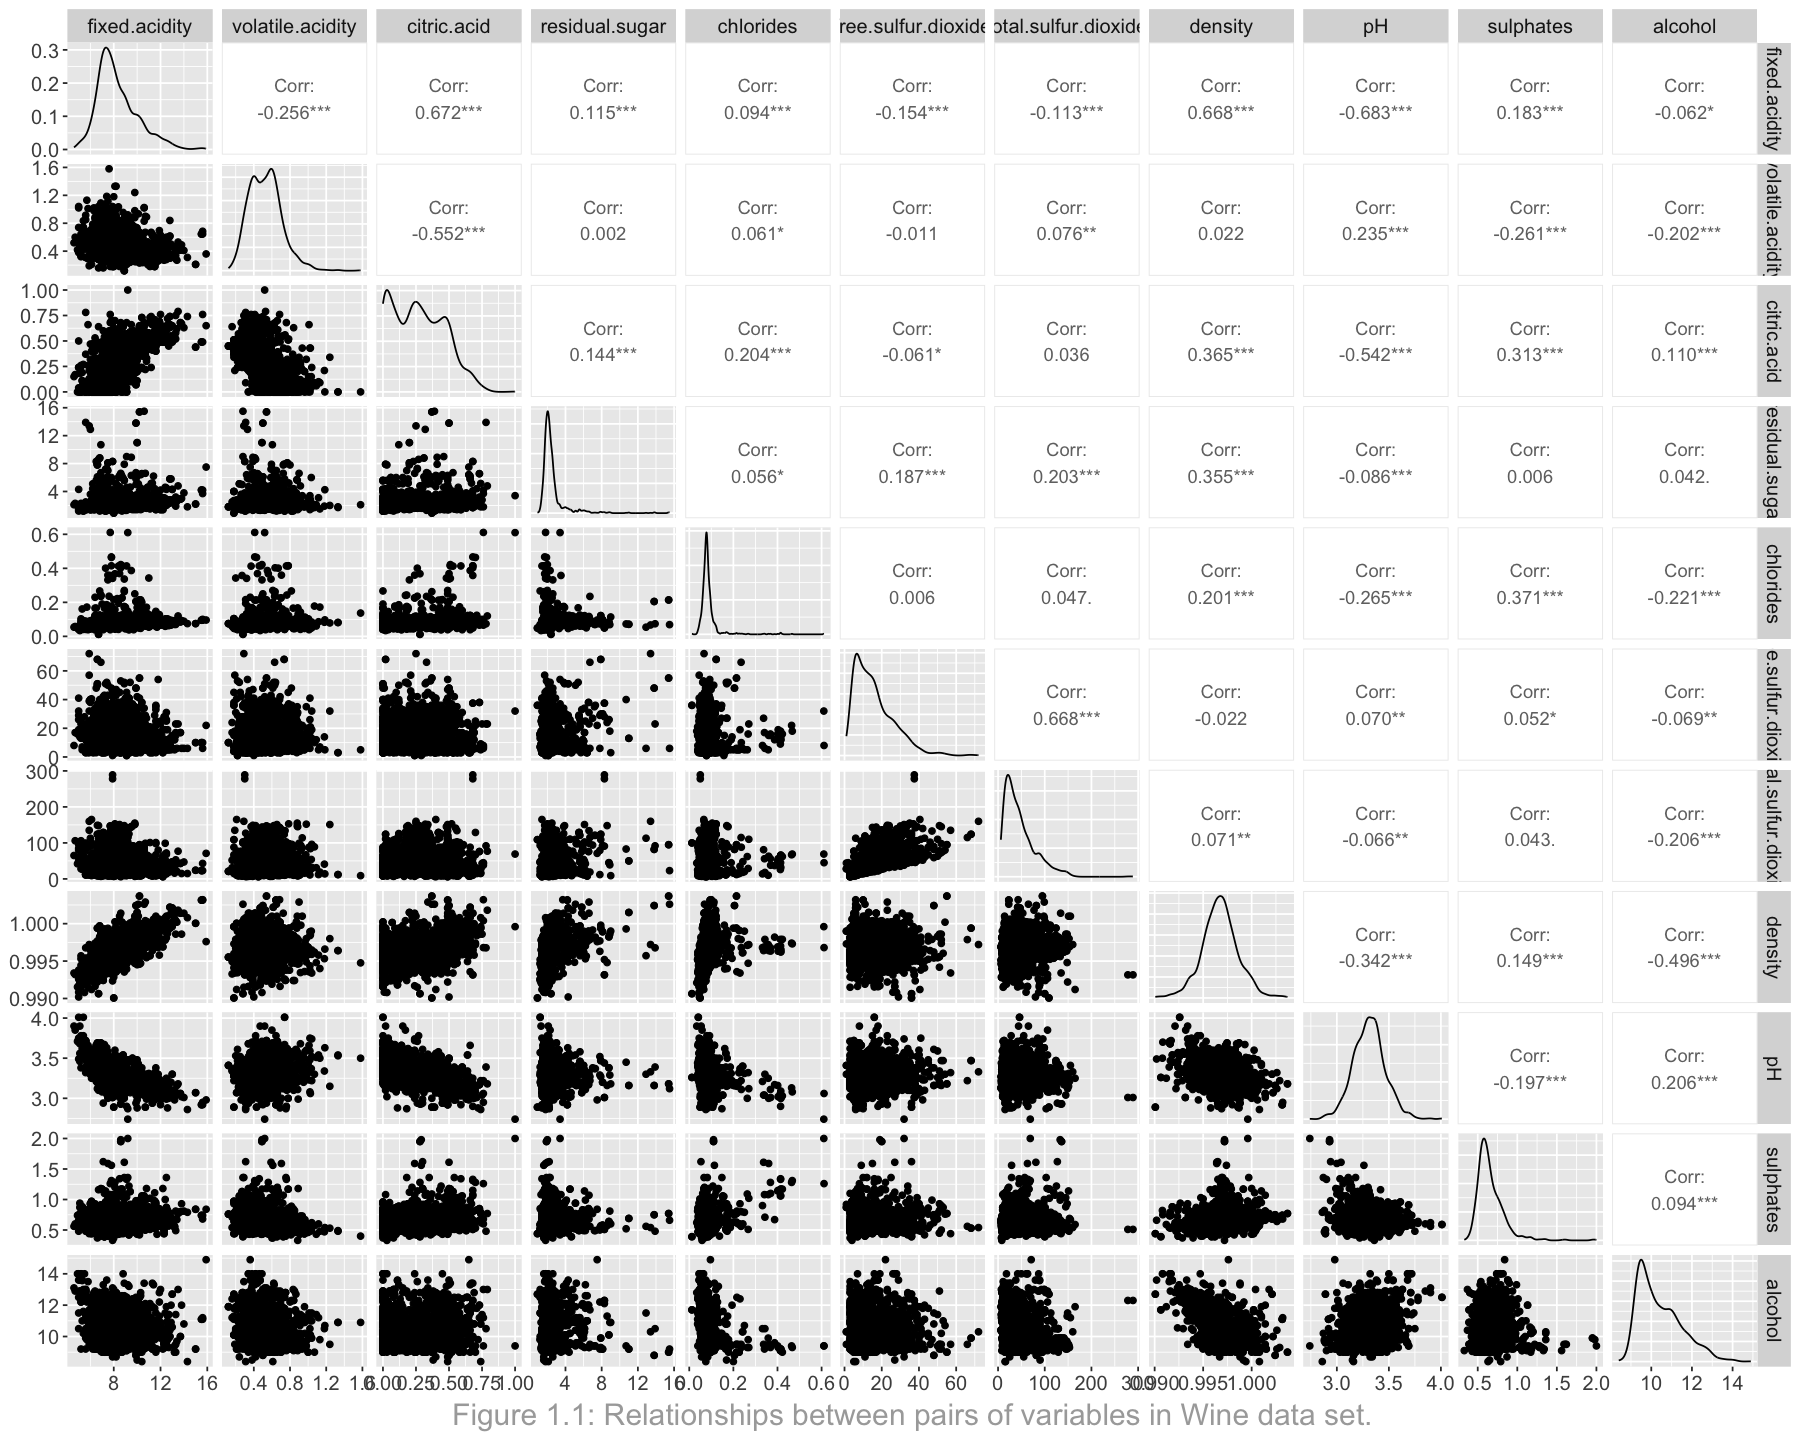

In [6]:
options(repr.plot.width = 15, repr.plot.height = 12)

correlation_plots <- data %>%
  select(- quality) %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    plot.caption = element_text(color = "darkgrey", size = 18, hjust = 0.5, vjust = 1)
  ) + 
  labs(caption = "Figure 1.1: Relationships between pairs of variables in Wine data set.")
  
  
correlation_plots

**Move the variables that has high correlation with others**


- citric.acid and fixed acidity
- PH and citric.acid
- density and fixed acidity
- free.sulfur.dioxide and total.sulfur.dioxide

we decide to remove citric.acid, density, PH and free.sulfur.dioxide 

In [7]:
df <- subset(data2, select = -c(citric.acid,density,pH,free.sulfur.dioxide))
head(df) 

,fixed.acidity,volatile.acidity,residual.sugar,chlorides,total.sulfur.dioxide,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,1.9,0.076,34,0.56,9.4,bad
2,7.8,0.88,2.6,0.098,67,0.68,9.8,bad
3,7.8,0.76,2.3,0.092,54,0.65,9.8,bad
4,11.2,0.28,1.9,0.075,60,0.58,9.8,good
5,7.4,0.70,1.9,0.076,34,0.56,9.4,bad
6,7.4,0.66,1.8,0.075,40,0.56,9.4,bad


## 4. Discussion

### 4.1. Summary and Expectations

[Do after Methods and Results]

### 4.2. Impact and Future Questions

[Impact done after Methods and Results]

Building on our initial analysis, future research could explore the impact of environmental changes like climate on the physicochemical composition of wine, delve into the genetic factors influencing grape quality, and employ advanced machine learning algorithms to uncover complex relationships between wine characteristics and sensory perceptions. Specifically, alternative data analysis methods such as deep learning and neural networks could be employed to analyze large datasets more effectively, identifying non-linear relationships and subtle patterns that traditional statistical methods may miss. Additionally, integrating big data analytics to process and analyze the vast amount of data generated from different wine regions could offer unprecedented insights into regional and varietal influences on wine quality. Investigating alternative fermentation techniques and conducting comparative studies across different wine regions could reveal new insights into optimizing wine quality. These efforts should embrace interdisciplinary approaches, combining advanced data analysis, biotechnology, and sensory evaluation to enhance our understanding of wine quality. Such research would not only deepen our knowledge of the factors affecting wine but also support the industry in adapting to evolving challenges and preferences, ultimately enriching the wine production and selection process.

## 5. References
Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T

Atlas Scientific. (n.d.). The Importance of pH In Wine-Making. Retrieved from https://www.atlas-scientific.com/